## Aprendizaje por reforzamiento

Q-learning

In [3]:
import numpy as np
import random

In [91]:
dimensiones = (5, 5)
estado_inicial = (0, 0)
estado_objetivo = (4, 4)
obstaculos = [(1, 1), (2, 3), (3, 0)]
acciones = [(-1, 0), (1, 0), (0, -1), (0, 1)]

In [92]:
num_estados = dimensiones[0] * dimensiones[1]
num_estados

25

In [93]:
num_acciones = len(acciones)
num_acciones

4

In [94]:
Q = np.zeros((num_estados, num_acciones))
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [95]:
def estado_a_indice(estado):
    return estado[0] * dimensiones[1] + estado[1]

In [96]:
ejemplo = estado_a_indice((4, 4))

In [97]:
ejemplo

24

In [98]:
alpha = 0.1 # Tasa de aprendizaje
gamma = 0.99 #Factor de descuento
epsilon = 0.2 # Tasa de exploracion
episodios = 100 

In [99]:
def indice_a_estado(indice):
    return (indice // dimensiones[1], indice % dimensiones[1])

In [100]:
indice_a_estado(4)

(0, 4)

In [106]:
def elegir_accion(estado):
    if random.uniform(0,1) < epsilon:
        return random.choice(range(num_acciones))
    else:
        # indice_estado = estado_a_indice(estado) --- IGNORE ---
        return np.argmax(Q[estado_a_indice(estado)])

In [102]:
def aplicar_accion(estado, accion_idx):
    accion = acciones[accion_idx]
    nuevo_estado = tuple(np.add(estado, accion) % dimensiones)

    if nuevo_estado in obstaculos or nuevo_estado == estado:
        return estado, -100, False
    if nuevo_estado == estado_objetivo:
        return nuevo_estado, 100, True
    return nuevo_estado, -1, False

In [103]:
for episodio in range(episodios):
    estado = estado_inicial
    terminado = False

    while not terminado:
        idx_estado = estado_a_indice(estado)
        accion_idx = elegir_accion(estado)
        nuevo_estado, recompensa, terminado = aplicar_accion(estado, accion_idx)
        idx_nuevo_estado = estado_a_indice(nuevo_estado)

        Q[idx_estado, accion_idx] = Q[idx_estado, accion_idx] + alpha * (recompensa + gamma * np.max(Q[idx_nuevo_estado]) - Q[idx_estado, accion_idx])

        estado = nuevo_estado

In [104]:
politica = np.zeros(dimensiones, dtype=int)
politica

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [105]:
for i in range(dimensiones[0]):
    for j in range(dimensiones[1]):
        estado = (i, j)
        idx_estado = estado_a_indice(estado)
        mejor_accion = np.argmax(Q[idx_estado])
        politica[i, j] = mejor_accion

print('Politica aprendida: (0: Arriba, 1: Abajo, 2: Izquierda, 3:Derecha)')
print(politica)

Politica aprendida: (0: Arriba, 1: Abajo, 2: Izquierda, 3:Derecha)
[[2 2 1 3 0]
 [0 0 1 1 0]
 [0 1 0 0 2]
 [0 3 2 2 1]
 [2 2 2 3 0]]


## SARSA

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

In [109]:
dimensiones = (4, 4)
estado_inicial = (0, 0)
estado_objetivo = (3, 3)
acciones = [(0, -1), (0, 1), (-1, 0), (1, 0)]
acciones_simbolos = ["Arriba", "Abajo", "Izquierda", "Derecha"]

In [110]:
num_estados = dimensiones[0] * dimensiones[1]
num_acciones = len(acciones)

In [111]:
Q = np.zeros((num_estados, num_acciones))

In [ ]:
alpha = 0.1
gamma = 0.99
epsilon = 0.2
episodios = 1000

In [ ]:
def estado_a_indice(estado):
    return estado[0] * dimensiones[1] + estado[1]

In [115]:
def elegir_accion(estado):
    if random.uniform(0, 1) < epsilon:
        return random.randint(0, num_acciones - 1)
    else:
        return np.argmax(Q[estado_a_indice(estado)])

In [116]:
def aplicar_accion(estado, accion_idx):
    accion = acciones[accion_idx]
    nuevo_estado = tuple(np.add(estado, accion) % np.array(dimensiones))


    if nuevo_estado == estado_objetivo:
        recompensa = 1
    else:
        recompensa = -1

    return nuevo_estado, recompensa, nuevo_estado == estado_objetivo

In [118]:
for episodio in range(episodios):
    estado = estado_inicial
    accion_idx = elegir_accion(estado)
    terminado = False

    while not terminado:
        nuevo_estado, recompensa, terminado = aplicar_accion(estado, accion_idx)
        num_acciones_idx = elegir_accion(nuevo_estado)

        indice = estado_a_indice(estado)
        Q[indice, accion_idx] += alpha * (
            recompensa
            + gamma * Q[estado_a_indice(nuevo_estado), num_acciones_idx]
            - Q[indice, accion_idx]
        )
        estado, accion_idx = nuevo_estado, num_acciones_idx

In [119]:
politica_simbolos = np.empty(dimensiones, dtype='<U2')
politica_simbolos

array([['', '', '', ''],
       ['', '', '', ''],
       ['', '', '', ''],
       ['', '', '', '']], dtype='<U2')

In [120]:
for i in range(dimensiones[0]):
    for j in range(dimensiones[1]):
        estado = (i, j)
        mejor_accion = np.argmax(Q[estado_a_indice(estado)])
        politica_simbolos[i, j] = acciones_simbolos[mejor_accion]

In [121]:
politica_simbolos

array([['Iz', 'Ab', 'Ar', 'Iz'],
       ['Ar', 'De', 'De', 'De'],
       ['Iz', 'De', 'De', 'De'],
       ['Ar', 'Ar', 'Ab', 'Ar']], dtype='<U2')

## Redes Q Profundas

In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical


2025-09-16 19:57:32.405016: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-16 19:57:33.078113: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-16 19:57:35.224697: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [4]:
mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [5]:
(imagenes_entrenamiento, etiquetas_entrenamiento), (imagenes_prueba, etiquetas_prueba) = mnist.load_data()

In [6]:
imagenes_entrenamiento = imagenes_entrenamiento / 255.0
imagenes_prueba = imagenes_prueba / 255.0

In [7]:
etiquetas_entrenamiento = to_categorical(etiquetas_entrenamiento)
etiquetas_prueba = to_categorical(etiquetas_prueba)

In [9]:
modelo = Sequential(
    [
        Flatten(input_shape=(28, 28)),
        Dense(128, activation="relu"),
        Dense(10, activation="softmax"),
    ]
)

/home/anderson-josue/anaconda3/lib/python3.13/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
E0000 00:00:1758071124.774191   16813 cuda_executor.cc:1309] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1758071124.782027   16813 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [10]:
modelo.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
modelo.fit(
    imagenes_entrenamiento,
    etiquetas_entrenamiento,
    epochs=5,
    validation_data=(imagenes_prueba, etiquetas_prueba),
)

Epoch 1/5


2025-09-16 20:11:16.199059: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 188160000 exceeds 10% of free system memory.


1856/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8737 - loss: 0.4434

2025-09-16 20:11:21.496444: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 31360000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9257 - loss: 0.2597 - val_accuracy: 0.9591 - val_loss: 0.1371
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9656 - loss: 0.1147 - val_accuracy: 0.9698 - val_loss: 0.0974
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9762 - loss: 0.0807 - val_accuracy: 0.9724 - val_loss: 0.0921
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9820 - loss: 0.0593 - val_accuracy: 0.9744 - val_loss: 0.0796
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9850 - loss: 0.0480 - val_accuracy: 0.9737 - val_loss: 0.0866


In [12]:
predicts = modelo.predict(imagenes_prueba)

 95/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

2025-09-16 20:17:45.931179: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 31360000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step


In [ ]:
def ver_imagen(array_predicciones, etiqueta_real, img):
    etiqueta_real, img = etiqueta_real.argmax(), img.squeeze()
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    etiqueta_predicha = np.argmax(array_predicciones)
    if etiqueta_predicha == etiqueta_real:
        color = "blue"
    else:
        color = "red"

    plt.xlabel(f"Pred: {etiqueta_predicha} Real: {etiqueta_real}", color=color)

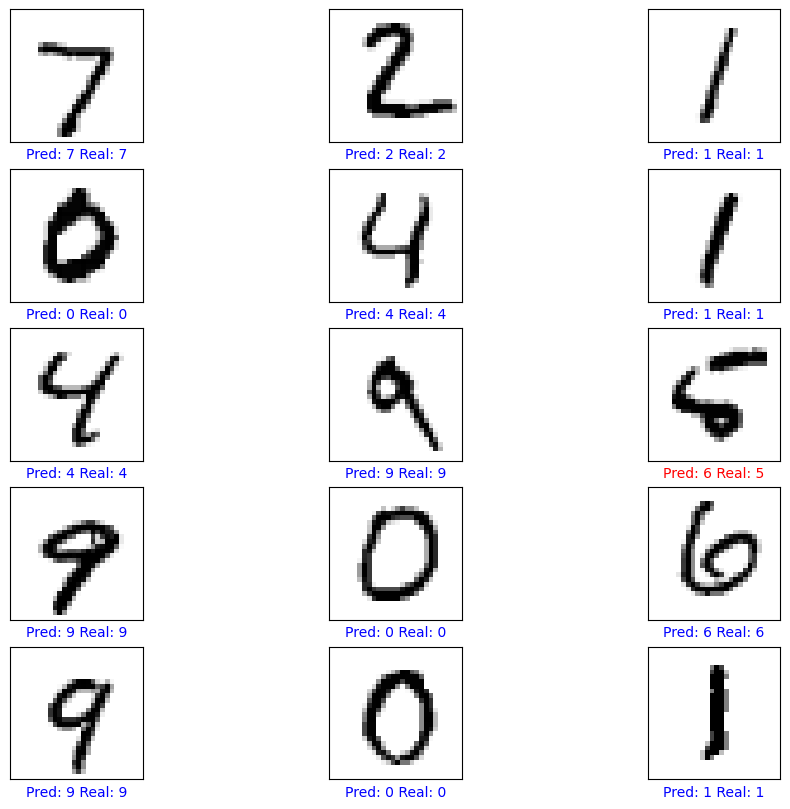

In [14]:
filas = 5 
columnas =3
numero_imagenes = filas * columnas
plt.figure(figsize=(2*2*columnas, 2*filas))

for i in range(numero_imagenes):
    plt.subplot(filas, 2*columnas, 2*i+1)
    ver_imagen(predicts[i], etiquetas_prueba[i], imagenes_prueba[i])